### Libraries

In [1]:
# Determinadas
import numpy as np
import pandas
import matplotlib.pyplot as plt
import copy
import math

# Procesamiento de imágenes
import numpy as np
import cv2
from scipy import ndimage as ndi

### Functions

In [2]:
def dilate(img, kernel):
    # Obtener forma de la máscara.
    h_kernel, w_kernel = kernel.shape
    
    # Obtener forma de la imagen.
    h, w = img.shape
    
    # Nueva imagen resultado.
    newImg = np.zeros_like(img)
    
    # Nueva imagen aumentada.
    extended_mat = np.zeros((h+h_kernel-1,w+w_kernel-1), dtype=int)
    
    # Obtener pisos de las dimensiones de la máscara.
    h_floor = math.floor(h_kernel/2)
    w_floor = math.floor(w_kernel/2)
    
    # Rellenar matriz aumentada.
    extended_mat[ h_floor:h+h_floor, w_floor:w+w_floor ] = img
    
    for i in range(h+h_kernel-1):
        for j in range(w+w_kernel-1):
            if (i >= h_floor and i < h+h_floor) and (j >= w_floor and j < w+w_floor):
                # Obtener región.
                region = extended_mat[i-h_floor:i+h_floor+1, j-w_floor:j+w_floor+1]
                
                # Restar matrices.
                imgCheck = kernel - region
                
                # Contar número de ceros.
                non_zero_count = np.count_nonzero(imgCheck==0)

                # Si hay un hit.
                if non_zero_count > 0:
                    # Encender el pixel.
                    newImg[i-h_floor,j-w_floor] = 1
                else:
                    # Apagar el pixel.
                    newImg[i-h_floor,j-w_floor] = 0
                
    return newImg

In [3]:
def erode(img, kernel):
    # Suma total del kernel.
    total_sum = np.sum(kernel)
    
    # Obtener forma de la máscara.
    h_kernel, w_kernel = kernel.shape
    
    # Obtener forma de la imagen.
    h, w = img.shape
    
    # Nueva imagen resultado.
    newImg = np.zeros_like(img)
    
    # Nueva imagen aumentada.
    extended_mat = np.zeros((h+h_kernel-1,w+w_kernel-1), dtype=int)
    
    # Obtener pisos de las dimensiones de la máscara.
    h_floor = math.floor(h_kernel/2)
    w_floor = math.floor(w_kernel/2)
    
    # Rellenar matriz aumentada.
    extended_mat[ h_floor:h+h_floor, w_floor:w+w_floor ] = img
    
    
    
    for i in range(h+h_kernel-1):
        for j in range(w+w_kernel-1):
            if (i >= h_floor and i < h+h_floor) and (j >= w_floor and j < w+w_floor):
                # Obtener región.
                region = extended_mat[i-h_floor:i+h_floor+1, j-w_floor:j+w_floor+1]
                
                # Restar matrices.
                imgCheck = kernel - region # (13x13) 
                
                # Contar número de ceros.
                non_zero_count = np.count_nonzero(imgCheck==0)

                # Si hay un fit.
                if non_zero_count == total_sum:
                    # Encender el pixel.
                    newImg[i-h_floor,j-w_floor] = 1
                else:
                    # Apagar el pixel.
                    newImg[i-h_floor,j-w_floor] = 0
                
    return newImg

### <br><br><br><br><br>1) First image

### Load Image

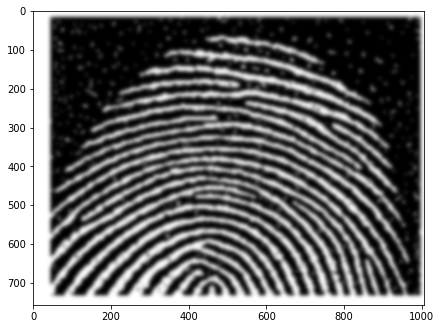

In [4]:
# Cargar imagen.
img1 = cv2.imread('Datasets/huella1.png')

# Imagen a escala de grises.
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Copiar imagen original.
imgT = img1.copy()

# Umbralizar.
threshold = 111
imgT[imgT <= threshold] = 0
imgT[imgT > threshold] = 1

# Obtener forma de la imagen.
h, w = imgT.shape

# Mostrar imagen.
plt.figure(figsize=(7,7))
plt.imshow(img1, cmap="gray")
plt.show()

### Apply algorithm

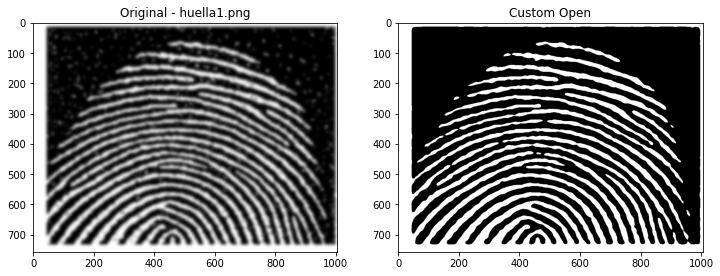

In [5]:
# Custom kernel.
kernel = [[1,1,1], 
          [1,1,1], 
          [1,1,1]]

# A np array.
kernel = np.asarray(kernel)

# Aplicar Custom Open (primero se erosiona y después se dilata)
newImg1 = erode(imgT.copy(), kernel)
newImg1 = dilate(newImg1.copy(), kernel)

# Mostrar imagen.
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(img1, cmap="gray")
plt.title("Original - huella1.png")
plt.subplot(1,2,2)
plt.imshow(newImg1, cmap="gray")
plt.title("Custom Open")
plt.show()

### <br><br><br><br><br>2) Second image

### Load Image

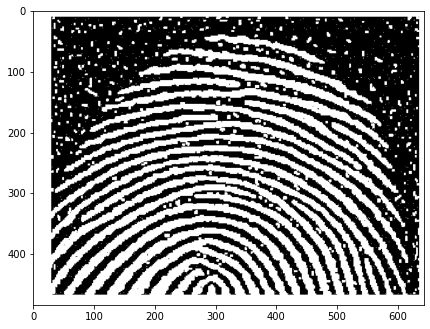

In [6]:
# Cargar imagen.
img2 = cv2.imread('Datasets/huella2.png')

# Imagen a escala de grises.
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Binarizar.
img2[img2 > 0] = 1

# Obtener forma de la imagen.
h, w = img2.shape

# Mostrar imagen.
plt.figure(figsize=(7,7))
plt.imshow(img2, cmap="gray")
plt.show()

### Apply algorithm

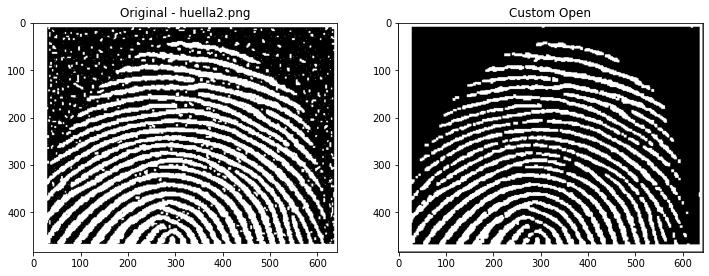

In [7]:
# Custom kernel.
kernel = [[1,1,1], 
          [1,1,1], 
          [1,1,1]]

# A np array.
kernel = np.asarray(kernel)

# Aplicar Custom Open (primero se erosiona y después se dilata)
newImg2 = erode(img2.copy(), kernel)
newImg2 = erode(newImg2.copy(), kernel)
newImg2 = erode(newImg2.copy(), kernel)
newImg2 = dilate(newImg2.copy(), kernel)
newImg2 = dilate(newImg2.copy(), kernel)

# Mostrar imagen.
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(img2, cmap="gray")
plt.title("Original - huella2.png")
plt.subplot(1,2,2)
plt.imshow(newImg2, cmap="gray")
plt.title("Custom Open")
plt.show()